In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

# Logistic Regression:

## Visualizing the data:

In [85]:
data = pd.read_csv(os.path.join('Data', 'ex2data1.txt'), delimiter=',',header=None).values
X, y = data[:, 0:2], data[:, 2]

In [86]:
def plotData(X, y):
    #From this function we can learn how to graph when dealing with
    #multiple features in the plane
    b1 = (y==0)
    b2 = (y==1)
    plt.scatter(X[b1,0],X[b1,1],color = 'r')
    plt.scatter(X[b2,0],X[b2,1],color = 'g')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')

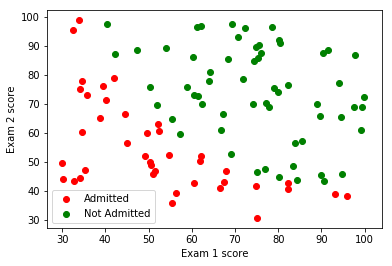

In [87]:
plotData(X,y)
plt.legend(['Admitted','Not Admitted']);

## Implementation:

In [88]:
def sigmoid(z):
    #We implement the sigmoid function
    return 1/(1+np.exp(-z))

In [89]:
#We charge the data again just to avoid conflicts when adding the
#extra column of ones:
data = pd.read_csv(os.path.join('Data', 'ex2data1.txt'), delimiter=',',header=None).values
X, y = data[:, 0:2], data[:, 2]

#add the new column:
X = np.append(np.ones((X.shape[0],1)),X,axis=1)

In [217]:
#Now the cost function (same as in linear regression)
def costFunc(theta,x,y):
    #We have to return both the cost and the gradient
    
    #Let's first compute the cost:
    J = 0
    n = x.shape[0]
    aux = sigmoid(x@theta)
    
    J = -(y@np.log(aux)+(1-y)@np.log(1-aux))/(n)
    
    #Let's compute the gradient:
    gradient = x.transpose()@(aux-y)/n
    
    return J, gradient

After this you can run the classic gradient descent using some $\alpha$ and controlling the number of iteretaions. Instead we can use the `minimize` function from Scipy. This is after this section. And by having the new parameter you can make predictions using the following function

In [214]:
def predict(theta, X):
    
    #After the dot product, we want the positive values:
    p = X@theta>=0
    
    return p

## Scipy

In [3]:
from scipy import optimize
#Optimize is a module that we are going to use to run
#the "advanced optimization" techniques

It provides an optimization module for root finding and minimization. As of `scipy 1.0`, the function `scipy.optimize.minimize` is the method to use for optimization problems(both constrained and unconstrained).

For logistic regression, you want to optimize the cost function $J(\theta)$ with parameters $\theta$.
Concretely, you are going to use `optimize.minimize` to find the best parameters $\theta$ for the logistic regression cost function, given a fixed dataset (of X and y values). You will pass to `optimize.minimize` the following inputs:
- `costFunction`: A cost function that, when given the training set and a particular $\theta$, computes the logistic regression cost and gradient with respect to $\theta$ for the dataset (X, y). 
- `initial_theta`: The initial values of the parameters we are trying to optimize.
- `(X, y)`: These are additional arguments to the cost function.
- `jac`: Indication if the cost function returns the Jacobian (gradient) along with cost value. (True)
- `method`: Optimization method/algorithm to use
- `options`: Additional options which might be specific to the specific optimization method. In the following, we only tell the algorithm the maximum number of iterations before it terminates.

The function `optimize.minimize` will converge on the right optimization parameters and return the final values of the cost and $\theta$ in a class object. Notice that by using `optimize.minimize`, you did not have to write any loops yourself, or set a learning rate like you did for gradient descent. This is all done by `optimize.minimize`: you only needed to provide a function calculating the cost and the gradient.

In [62]:
# set options for optimize.minimize
options= {'maxiter': 400}

# The function returns an object `OptimizeResult`
# We use truncated Newton algorithm for optimization
res = optimize.minimize(cost_func,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

res

     fun: 0.20349770158947492
     jac: array([  9.32681149e-09,   1.15776343e-07,   4.86078485e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131854,   0.20623159,   0.20147149])

We can see:
- fun: error of local minimum
- x: local minimum
- nit: number of iterations

Here I am going to define a function that will let us draw a line in a scatter plot, notice that it can be mofidied so that we can fit any curve

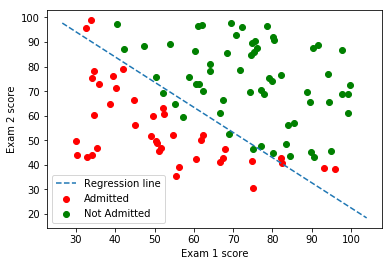

In [94]:
import matplotlib.pyplot as plt 
import numpy as np    

def abline(theta):
    #from: https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib
    #get current axis
    axes = plt.gca()
    
    #get_xlim() => lims from graph
    x_vals = np.array(axes.get_xlim())
    
    y_vals = (-theta[0]-theta[1]*x_vals)/theta[2]
    plt.plot(x_vals, y_vals, '--')
    
plotData(X[:,1:],y)
abline(res.x)
plt.legend(['Regression line','Admitted','Not Admitted']);

## Regularized Logistic Regression
The only thing that we need to change is the cost function, since we are going to use `minimize` in order to fit our parameters (we need to choose the right lambda to avoid overfit and underfit).

In [ ]:
def costFunctionReg(theta, X, y, lambda_):
    # Initialize some useful values
    m = y.size  
    theta_aux = theta.copy()
    theta_aux[0] = 0
    aux = sigmoid(X@theta)
    
    #Cost:
    J = -y@np.log(aux) - (1-y)@np.log(1-aux)
    J /= m
    J += theta_aux@theta_aux*lambda_/(2*m)
    
    grad = (X.transpose()@(aux-y) + lambda_*theta_aux)/m
    return J, grad